In [154]:
###Creating synthetic data
##Preparing the data
import pandas as pd
import numpy as np 

ecf_data = pd.read_csv("C:/Users/dkim.CENSEO/Downloads/Emergency_Connectivity_Fund_FCC_Form_471_20231229.csv")
ecf_data.describe()
ecf_data = ecf_data[ecf_data['Form Version'] == 'Current']

ecf_data_sample = ecf_data.sample(frac=0.5) #this is to select on 50% of the data
ecf_data_sample.shape

(31463, 82)

In [135]:
ecf_data.shape

(62926, 82)

In [137]:
ecf_data_sample.columns

Index(['Application Number', 'Form Version', 'Form PDF', 'Application Status',
       'Application Nickname', 'Filing Window', 'Applicant Name',
       'Billed Entity Address', 'Billed Entity City', 'Billed Entity State',
       'Billed Entity ZIP code', 'Billed Entity ZIP Code Ext',
       'Billed Entity Number (BEN)', 'FCC Registration Number',
       'Applicant Type', 'Applicant Subtype', 'Contact Name', 'Contact Phone',
       'Contact Email', 'Consulting Firm', 'Total Student Count',
       'Urban/ Rural Status', 'Selected Members Entity Data',
       'Total Count of Selected Members',
       'Unmet Student Needs 1 (At start of pandemic lacked access to device)',
       'Unmet Student Needs 2 (At start of pandemic lacked access to connection)',
       'Unmet Student Needs 3 (At start of pandemic lacked access to device and connection)',
       'Unmet Student Needs 4 (During 2020-2021 provided access to device)',
       'Unmet Student Needs 5 (During 2020-2021 provided access to co

In [155]:
ecf_data_sample['unique_key'] = ecf_data_sample['Funding Request Number (FRN)'].astype(str) + '_' + ecf_data_sample['FRN Line Item ID'].astype(str) + '_' + ecf_data_sample['One-time Unit Cost'].astype(str) + '_' + ecf_data_sample['One-time Unit Quantity'].astype(str)
#One-time Unit Quantity maybe add this one?


In [139]:
ecf_data_sample['unique_key']

99776      ECF2290010381_1_400.0_60
64797         ECF2290000328_3_0.0_0
24029         ECF2190008307_1_0.0_0
88355       ECF2190014576_1_60.0_10
13294     ECF2290002511_1_399.0_132
                    ...            
59        ECF2190004608_3_240.18_23
23900     ECF2190032820_1_249.99_30
108731    ECF2190020402_1_156.3_383
13268     ECF2190006943_1_390.16_10
20328         ECF2290006628_1_0.0_0
Name: unique_key, Length: 18878, dtype: object

In [156]:
ecf_data_sample_selected = ecf_data_sample.loc[:, ['Application Number', 'unique_key', 'Total Funding Commitment Request Amount', 'Product Type', 'Urban/ Rural Status', 'Monthly Recurring Unit Cost', 'Total Student Count']]
ecf_data_sample_selected.shape #Two identifiers, 3 continous variable, 2 categorical variable


(31463, 7)

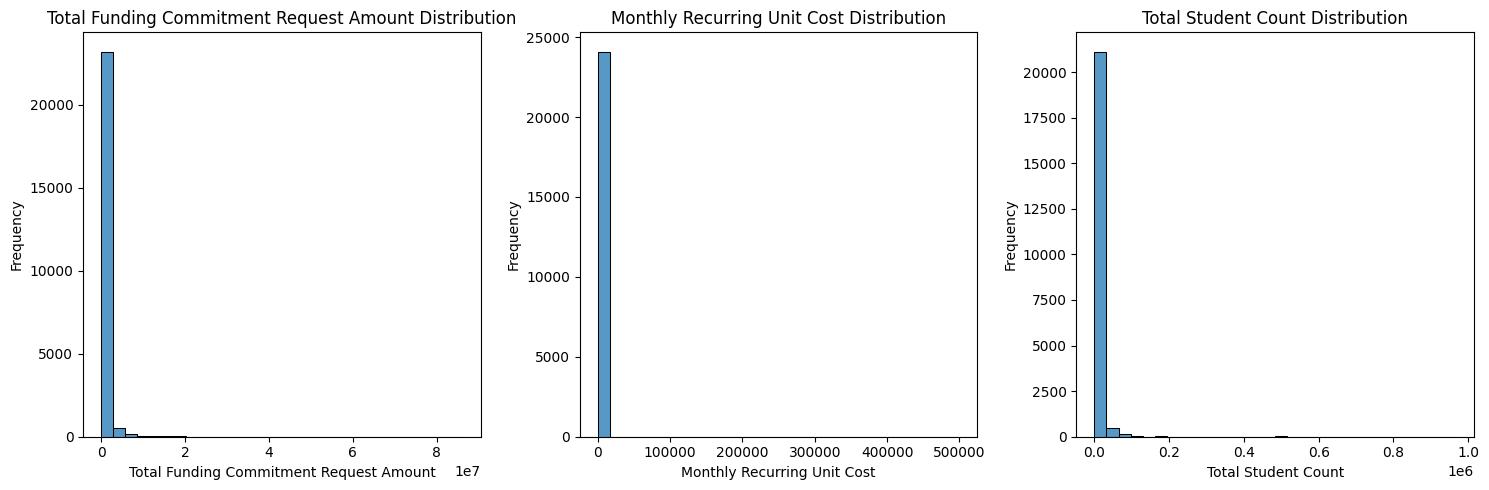

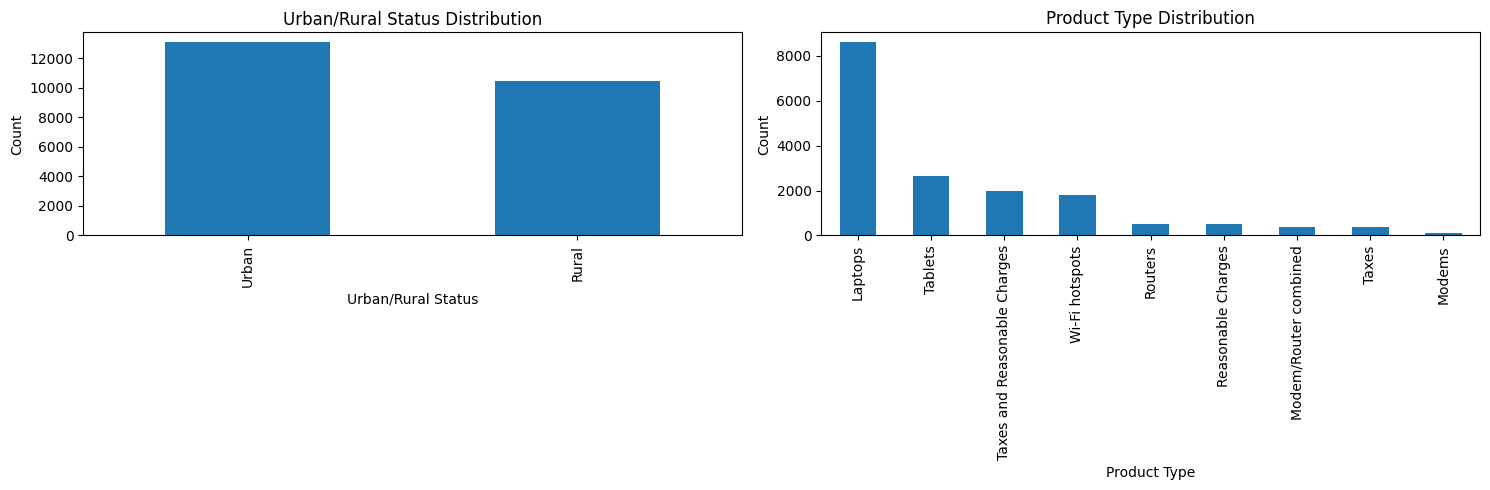

In [29]:
##Visuals
#This shows the entirety of the data
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for 'Total Funding Commitment Request Amount', 'Monthly Recurring Unit Cost', 'Total Student Count'
plt.figure(figsize=(15, 5))

# Total Funding Commitment Request Amount
plt.subplot(1, 3, 1)
sns.histplot(ecf_data_sample_selected['Total Funding Commitment Request Amount'], kde=False, bins=30)
plt.title('Total Funding Commitment Request Amount Distribution')
plt.xlabel('Total Funding Commitment Request Amount')
plt.ylabel('Frequency')

# Monthly Recurring Unit Cost
plt.subplot(1, 3, 2)
sns.histplot(ecf_data_sample_selected['Monthly Recurring Unit Cost'], kde=False, bins=30)
plt.title('Monthly Recurring Unit Cost Distribution')
plt.xlabel('Monthly Recurring Unit Cost')
plt.ylabel('Frequency')

# Total Student Count
plt.subplot(1, 3, 3)
sns.histplot(ecf_data_sample_selected['Total Student Count'], kde=False, bins=30)
plt.title('Total Student Count Distribution')
plt.xlabel('Total Student Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bar Graphs for 'Urban/Rural Status', and 'Service Type'
plt.figure(figsize=(15, 5))

# Urban/Rural Status
plt.subplot(1, 2, 1)
ecf_data_sample_selected['Urban/ Rural Status'].value_counts().plot(kind='bar')
plt.title('Urban/Rural Status Distribution')
plt.xlabel('Urban/Rural Status')
plt.ylabel('Count')

# Product Type
plt.subplot(1, 2, 2)
ecf_data_sample_selected['Product Type'].value_counts().plot(kind='bar')
plt.title('Product Type Distribution')
plt.xlabel('Product Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


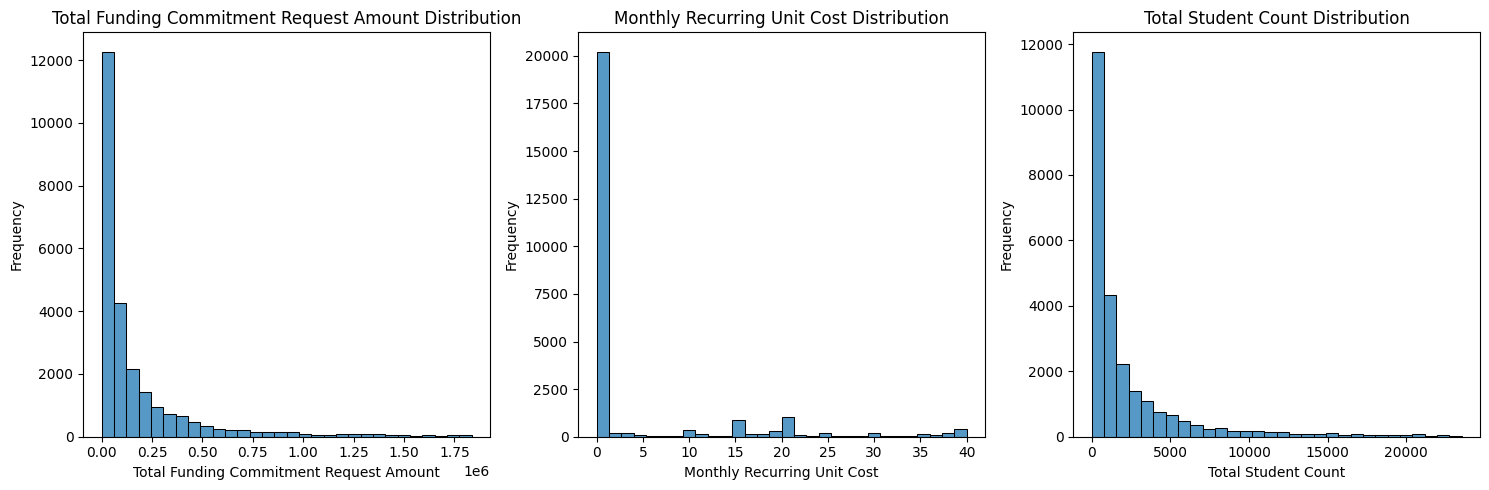

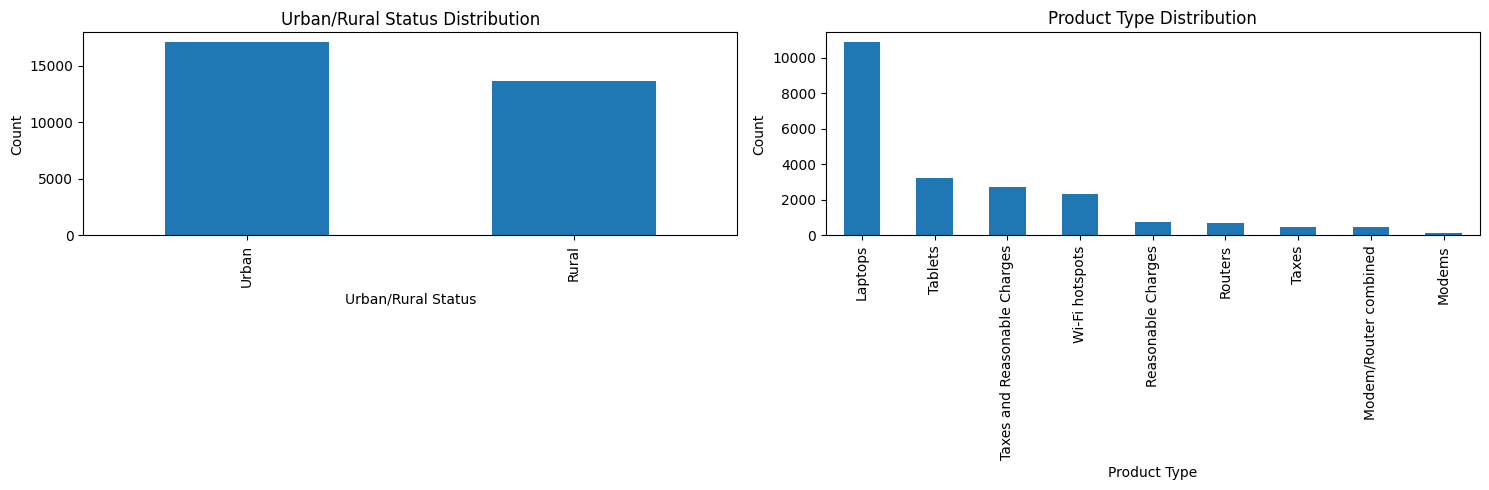

In [157]:
##This shows the synthetic data, we can see total funding, total student, and categorical variables seem to be pretty similar, but not monthly recurring cost
#Note: The top 95% quantile is cut off to get rid of outliers (for visual purpose since the distribution is left skewed)
import matplotlib.pyplot as plt
import seaborn as sns

# Set upper limits for each variable to filter out extreme values
upper_limit_funding = ecf_data_sample_selected['Total Funding Commitment Request Amount'].quantile(0.95)
upper_limit_monthly_cost = ecf_data_sample_selected['Monthly Recurring Unit Cost'].quantile(0.95)
upper_limit_student_count = ecf_data_sample_selected['Total Student Count'].quantile(0.95)

# Filter the data based on these upper limits
filtered_data = ecf_data_sample_selected[
    (ecf_data_sample_selected['Total Funding Commitment Request Amount'] <= upper_limit_funding) &
    (ecf_data_sample_selected['Monthly Recurring Unit Cost'] <= upper_limit_monthly_cost) &
    (ecf_data_sample_selected['Total Student Count'] <= upper_limit_student_count)
]

# Histograms for filtered data
plt.figure(figsize=(15, 5))

# Total Funding Commitment Request Amount
plt.subplot(1, 3, 1)
sns.histplot(filtered_data['Total Funding Commitment Request Amount'], kde=False, bins=30)
plt.title('Total Funding Commitment Request Amount Distribution')
plt.xlabel('Total Funding Commitment Request Amount')
plt.ylabel('Frequency')

# Monthly Recurring Unit Cost
plt.subplot(1, 3, 2)
sns.histplot(filtered_data['Monthly Recurring Unit Cost'], kde=False, bins=30)
plt.title('Monthly Recurring Unit Cost Distribution')
plt.xlabel('Monthly Recurring Unit Cost')
plt.ylabel('Frequency')

# Total Student Count
plt.subplot(1, 3, 3)
sns.histplot(filtered_data['Total Student Count'], kde=False, bins=30)
plt.title('Total Student Count Distribution')
plt.xlabel('Total Student Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bar Graphs for 'Urban/Rural Status', and 'Service Type'
plt.figure(figsize=(15, 5))

# Urban/Rural Status
plt.subplot(1, 2, 1)
ecf_data_sample_selected['Urban/ Rural Status'].value_counts().plot(kind='bar')
plt.title('Urban/Rural Status Distribution')
plt.xlabel('Urban/Rural Status')
plt.ylabel('Count')

# Product Type
plt.subplot(1, 2, 2)
ecf_data_sample_selected['Product Type'].value_counts().plot(kind='bar')
plt.title('Product Type Distribution')
plt.xlabel('Product Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [158]:
from sdv.lite import SingleTablePreset
from sdv.datasets.demo import download_demo
from sdv.evaluation.single_table import get_column_plot, evaluate_quality, get_column_pair_plot

In [159]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

In [160]:
metadata.detect_from_dataframe(data=ecf_data_sample_selected)

In [161]:
python_dict = metadata.to_dict()
python_dict

{'columns': {'Application Number': {'sdtype': 'unknown', 'pii': True},
  'unique_key': {'sdtype': 'id'},
  'Total Funding Commitment Request Amount': {'sdtype': 'numerical'},
  'Product Type': {'sdtype': 'categorical'},
  'Urban/ Rural Status': {'sdtype': 'categorical'},
  'Monthly Recurring Unit Cost': {'sdtype': 'numerical'},
  'Total Student Count': {'sdtype': 'numerical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'primary_key': 'unique_key'}

In [162]:
metadata.validate()

In [163]:
metadata.update_column(
    column_name='unique_key',
    sdtype='id'
)


In [ ]:
metadata.set_primary_key(column_name='unique_key') #be sure this is completely unique, no duplicates

In [165]:
from sdv.single_table import GaussianCopulaSynthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

In [166]:
synthesizer.fit(ecf_data_sample_selected) #the primary key has to be unique with no duplicates

In [169]:
synthetic_data = synthesizer.sample(num_rows=25000)
synthetic_data.head()

,Application Number,unique_key,Total Funding Commitment Request Amount,Product Type,Urban/ Rural Status,Monthly Recurring Unit Cost,Total Student Count
0,sdv-pii-8hxch,sdv-id-15000,17.125775,NaN,Urban,3.90,3359.0
1,sdv-pii-ocobl,sdv-id-15001,2431.533695,Taxes and Reasonable Charges,Urban,0.00,120.0
2,sdv-pii-6z9hd,sdv-id-15002,312606.797622,Reasonable Charges,Rural,158.81,5516.0
3,sdv-pii-ibv5v,sdv-id-15003,319.081284,Laptops,Rural,0.01,7253.0
4,sdv-pii-co3x6,sdv-id-15004,606.785090,Laptops,Rural,0.02,7089.0


In [170]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=ecf_data_sample_selected,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 21/21 [00:00<00:00, 73.25it/s] 

Overall Score: 60.64%

Properties:
- Column Shapes: 83.64%
- Column Pair Trends: 37.64%


In [172]:
synthetic_data.shape, ecf_data_sample_selected.shape


((25000, 7), (31463, 7))

In [173]:
quality_report.get_score()

0.6064113902901413

In [174]:
quality_report.get_properties()

,Property,Score
0,Column Shapes,0.836409
1,Column Pair Trends,0.376414


In [175]:
quality_report.get_details(property_name='Column Shapes') #Figure out what these results mean, might need to read notes

,Column,Metric,Score
0,Total Funding Commitment Request Amount,KSComplement,0.844839
1,Product Type,TVComplement,0.993699
2,Urban/ Rural Status,TVComplement,0.998252
3,Monthly Recurring Unit Cost,KSComplement,0.544342
4,Total Student Count,KSComplement,0.800913


In [176]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=ecf_data_sample_selected,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 330.65it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [178]:
diagnostic_report.get_properties()

,Property,Score
0,Data Validity,1.0
1,Data Structure,1.0


In [194]:
##TVAE version
#Source: https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/tvaesynthesizer
from sdv.single_table import TVAESynthesizer

#synthesizer = TVAESynthesizer(metadata)
synthesizer = TVAESynthesizer( #the enforce min max has to be on, it helps increase the accuracy
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500
)
synthesizer.fit(ecf_data_sample_selected)

synthetic_data = synthesizer.sample(num_rows=25000)


In [195]:
quality_report = evaluate_quality( #Compared to the gausian method there has been some improvement overall, but in detail it holds a differnt story
    real_data=ecf_data_sample_selected, #also this is the model without hyperparameter trained
    synthetic_data=synthetic_data,
    metadata=metadata #63% overal score, column shapes is 87%, column pair trends is 38% if the model is not trained hyperparameter
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 21/21 [00:00<00:00, 59.50it/s]

Overall Score: 63.72%

Properties:
- Column Shapes: 88.35%
- Column Pair Trends: 39.1%


In [196]:
quality_report.get_details(property_name='Column Shapes') #substatial improvement in the continous and categorical variables, only the monthly recurring unit cost is still low in general

,Column,Metric,Score
0,Total Funding Commitment Request Amount,KSComplement,0.933826
1,Product Type,TVComplement,0.949281
2,Urban/ Rural Status,TVComplement,0.987347
3,Monthly Recurring Unit Cost,KSComplement,0.630942
4,Total Student Count,KSComplement,0.916104


In [192]:
synthetic_data.head()

,Application Number,unique_key,Total Funding Commitment Request Amount,Product Type,Urban/ Rural Status,Monthly Recurring Unit Cost,Total Student Count
0,sdv-pii-7j01e,sdv-id-0,1.326907e+06,Tablets,Rural,0.00,5021.0
1,sdv-pii-s7nmg,sdv-id-1,4.196989e+05,Wi-Fi hotspots,Urban,0.00,1613.0
2,sdv-pii-xkdy1,sdv-id-2,1.734200e+05,Taxes,Urban,0.53,1452.0
3,sdv-pii-dstzj,sdv-id-3,9.515791e+05,Laptops,Urban,0.39,NaN
4,sdv-pii-2ad8y,sdv-id-4,1.346862e+05,Laptops,Rural,0.36,996.0


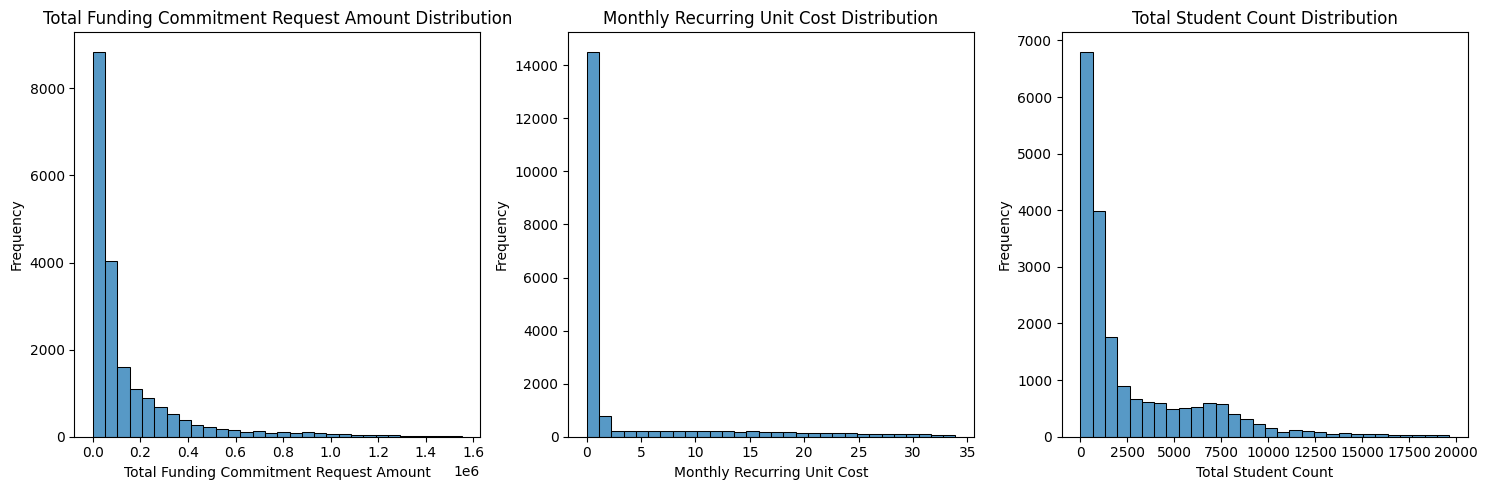

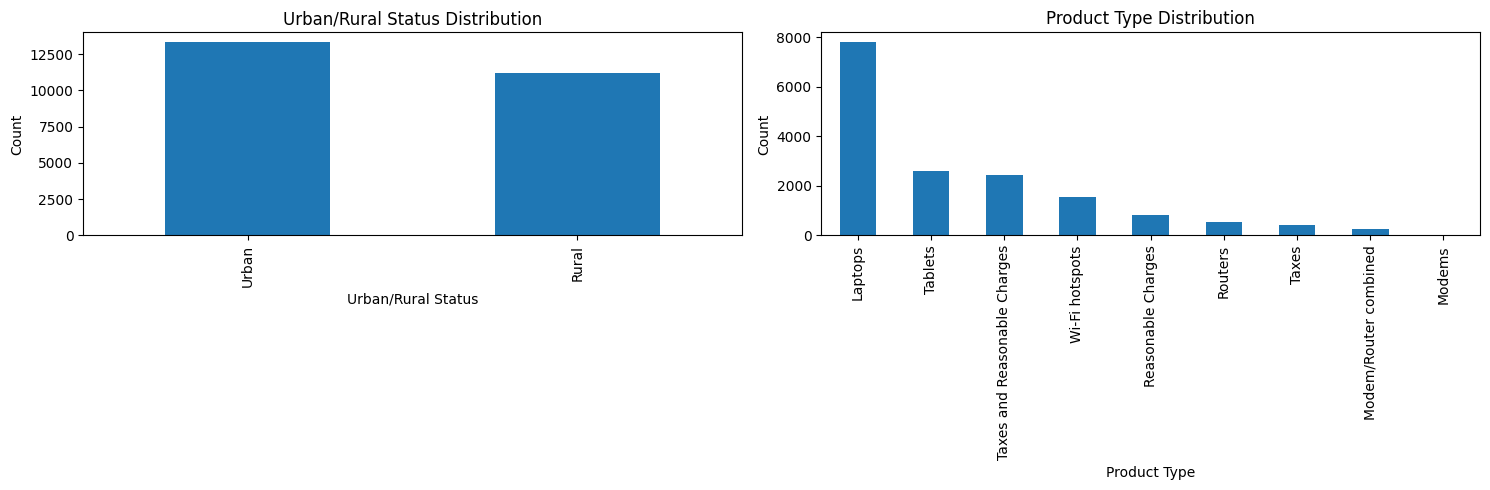

In [197]:
##This shows the real data
import matplotlib.pyplot as plt
import seaborn as sns

# Set upper limits for each variable to filter out extreme values
upper_limit_funding = synthetic_data['Total Funding Commitment Request Amount'].quantile(0.95)
upper_limit_monthly_cost = synthetic_data['Monthly Recurring Unit Cost'].quantile(0.95)
upper_limit_student_count = synthetic_data['Total Student Count'].quantile(0.95)

# Filter the data based on these upper limits
filtered_data = synthetic_data[
    (synthetic_data['Total Funding Commitment Request Amount'] <= upper_limit_funding) &
    (synthetic_data['Monthly Recurring Unit Cost'] <= upper_limit_monthly_cost) &
    (synthetic_data['Total Student Count'] <= upper_limit_student_count)
]

# Histograms for filtered data
plt.figure(figsize=(15, 5))

# Total Funding Commitment Request Amount
plt.subplot(1, 3, 1)
sns.histplot(filtered_data['Total Funding Commitment Request Amount'], kde=False, bins=30)
plt.title('Total Funding Commitment Request Amount Distribution')
plt.xlabel('Total Funding Commitment Request Amount')
plt.ylabel('Frequency')

# Monthly Recurring Unit Cost
plt.subplot(1, 3, 2)
sns.histplot(filtered_data['Monthly Recurring Unit Cost'], kde=False, bins=30)
plt.title('Monthly Recurring Unit Cost Distribution')
plt.xlabel('Monthly Recurring Unit Cost')
plt.ylabel('Frequency')

# Total Student Count
plt.subplot(1, 3, 3)
sns.histplot(filtered_data['Total Student Count'], kde=False, bins=30)
plt.title('Total Student Count Distribution')
plt.xlabel('Total Student Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bar Graphs for 'Urban/Rural Status', and 'Service Type'
plt.figure(figsize=(15, 5))

# Urban/Rural Status
plt.subplot(1, 2, 1)
synthetic_data['Urban/ Rural Status'].value_counts().plot(kind='bar')
plt.title('Urban/Rural Status Distribution')
plt.xlabel('Urban/Rural Status')
plt.ylabel('Count')

# Product Type
plt.subplot(1, 2, 2)
synthetic_data['Product Type'].value_counts().plot(kind='bar')
plt.title('Product Type Distribution')
plt.xlabel('Product Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()